In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
from funciones_toolbox_ml_final import *


In [2]:
df = pd.read_csv("data/titanic.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     182 non-null    int64  
 1   pclass       182 non-null    int64  
 2   sex          182 non-null    object 
 3   age          182 non-null    float64
 4   sibsp        182 non-null    int64  
 5   parch        182 non-null    int64  
 6   fare         182 non-null    float64
 7   embarked     182 non-null    object 
 8   class        182 non-null    object 
 9   who          182 non-null    object 
 10  adult_male   182 non-null    bool   
 11  deck         182 non-null    object 
 12  embark_town  182 non-null    object 
 13  alive        182 non-null    object 
 14  alone        182 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 20.3+ KB


In [3]:
df_vinos = pd.read_csv("data/wines_dataset.csv", sep = "|")

In [4]:
df_vinos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,white
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,white
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,red


In [5]:
df_vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df_vinos["class"].value_counts()

class
white    4898
red      1599
Name: count, dtype: int64

In [7]:
target_vinos = "class"

In [8]:
df.dropna(inplace=True)

In [9]:
target = "survived"

In [13]:
get_features_num_classification(df,"alive")

Las siguientes columnas no pasaron el test de significancia:
['pclass', 'sibsp', 'parch', 'fare', 'alone']

 Las siguientes columnas pasaron el test de significancia:


c:\Users\vanep\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


['survived', 'age', 'adult_male']

In [11]:
df_creditos = pd.read_csv("credit_npo.csv")
df_creditos

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [12]:
df_creditos.dropna(inplace = True)
df_creditos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [31]:
get_features_num_classification(df_creditos,"SeriousDlqin2yrs", pvalue=0.0009)

Las siguientes columnas no pasaron el test de significancia:
['DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines']

 Las siguientes columnas pasaron el test de significancia:


['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [14]:
df_temps = pd.read_csv("temps.csv")
df_temps

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [16]:
def plot_pairplots(df, target_col="", columns=[], pvalue=0.05):
    # Comprobar si el dataframe es de tipo DataFrame de pandas
    if not isinstance(df, pd.DataFrame):
        print("Error: El argumento 'dataframe' no es un DataFrame de pandas.")
        return None
    
    # Comprobar si la columna target_col está presente en el dataframe
    if target_col not in df.columns:
        print("Error: 'target_col' no es una columna válida del dataframe.")
        return None
    
    # Comprobar si la lista de columnas a considerar es válida
    if not all(col in df.columns for col in columns):
        print("Error: Una o más columnas especificadas no están presentes en el dataframe.")
        return None
    
    # Comprobar si la lista de columnas está vacía y si lo está, llenarla con las columnas numéricas
    if not columns:
        columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Comprobar si el valor de pvalue es válido
    if not isinstance(pvalue, float):
        print("Error: El argumento 'pvalue' debe ser un valor float.")
        return None
    
    # Obtener las columnas numéricas significativas usando la función get_features_num_classification
    significant_columns = get_features_num_classification(df, target_col, pvalue)
    
    # Filtrar las columnas de interés que sean significativas
    significant_columns = [col for col in columns if col in significant_columns]
    
    # Dividir el dataframe por valores únicos de target_col si el número de valores posibles es mayor que 5
    if len(df[target_col].unique()) > 5:
        unique_values = df[target_col].unique()
        num_plots = len(unique_values) // 5 + (1 if len(unique_values) % 5 != 0 else 0)
        
        for i in range(num_plots):
            start_index = i * 5
            end_index = min((i + 1) * 5, len(unique_values))
            target_subset = unique_values[start_index:end_index]
            
            # Filtrar el DataFrame por los valores únicos de target_col
            subset_df = df[df[target_col].isin(target_subset)]
            
            # Dividir las columnas significativas en grupos de máximo cinco columnas por pairplot
            num_cols = len(significant_columns)
            num_subplots = num_cols // 4 + (1 if num_cols % 4 != 0 else 0)
            
            for j in range(num_subplots):
                start_col_index = j * 4
                end_col_index = min((j + 1) * 4, num_cols)
                subset_columns = significant_columns[start_col_index:end_col_index]
                
                # Asegurar que target_col esté presente en el pairplot
                if target_col not in subset_columns:
                    subset_columns.append(target_col)
                
                # Pintar el pairplot
                sns.pairplot(subset_df, hue=target_col, vars=subset_columns)
                plt.show()
    else:
        # Pintar el pairplot con todas las variables significativas
        sns.pairplot(df, hue=target_col, vars=significant_columns)
        plt.show()
    
    return significant_columns


Las siguientes columnas no pasaron el test de significancia:
- pH
Las siguientes columnas pasaron el test de significancia:


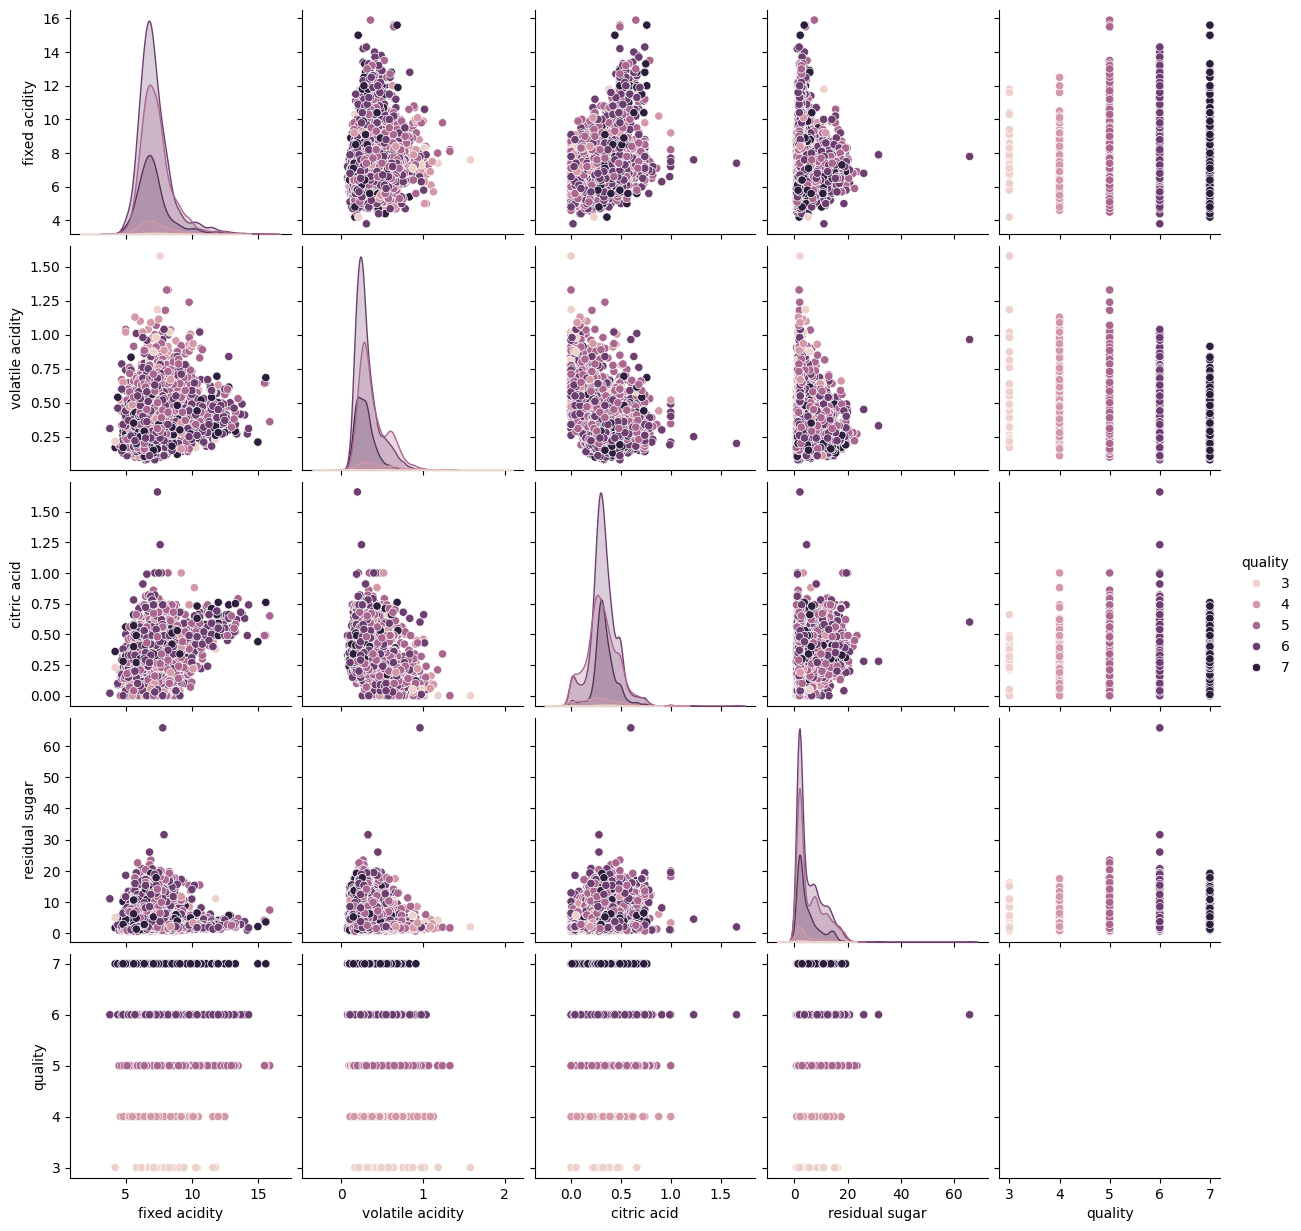

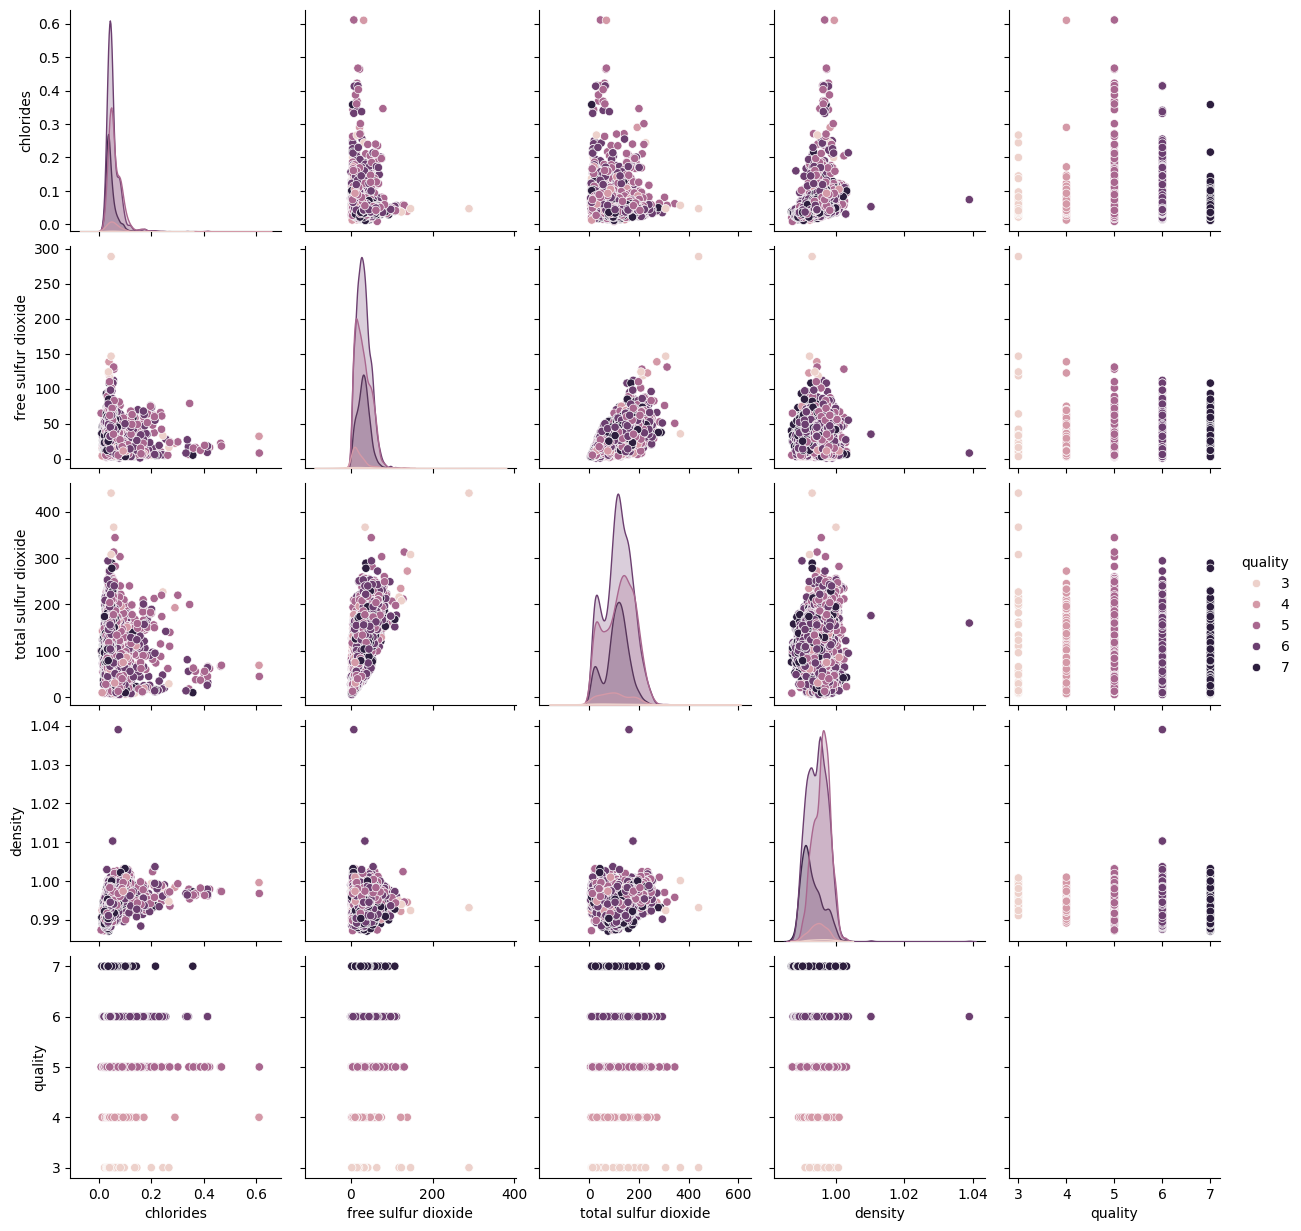

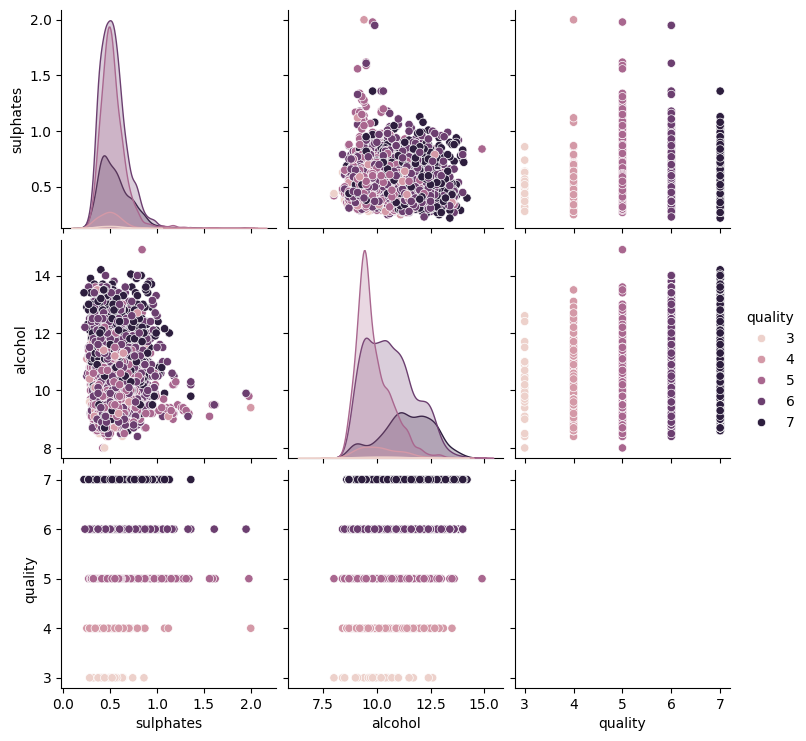

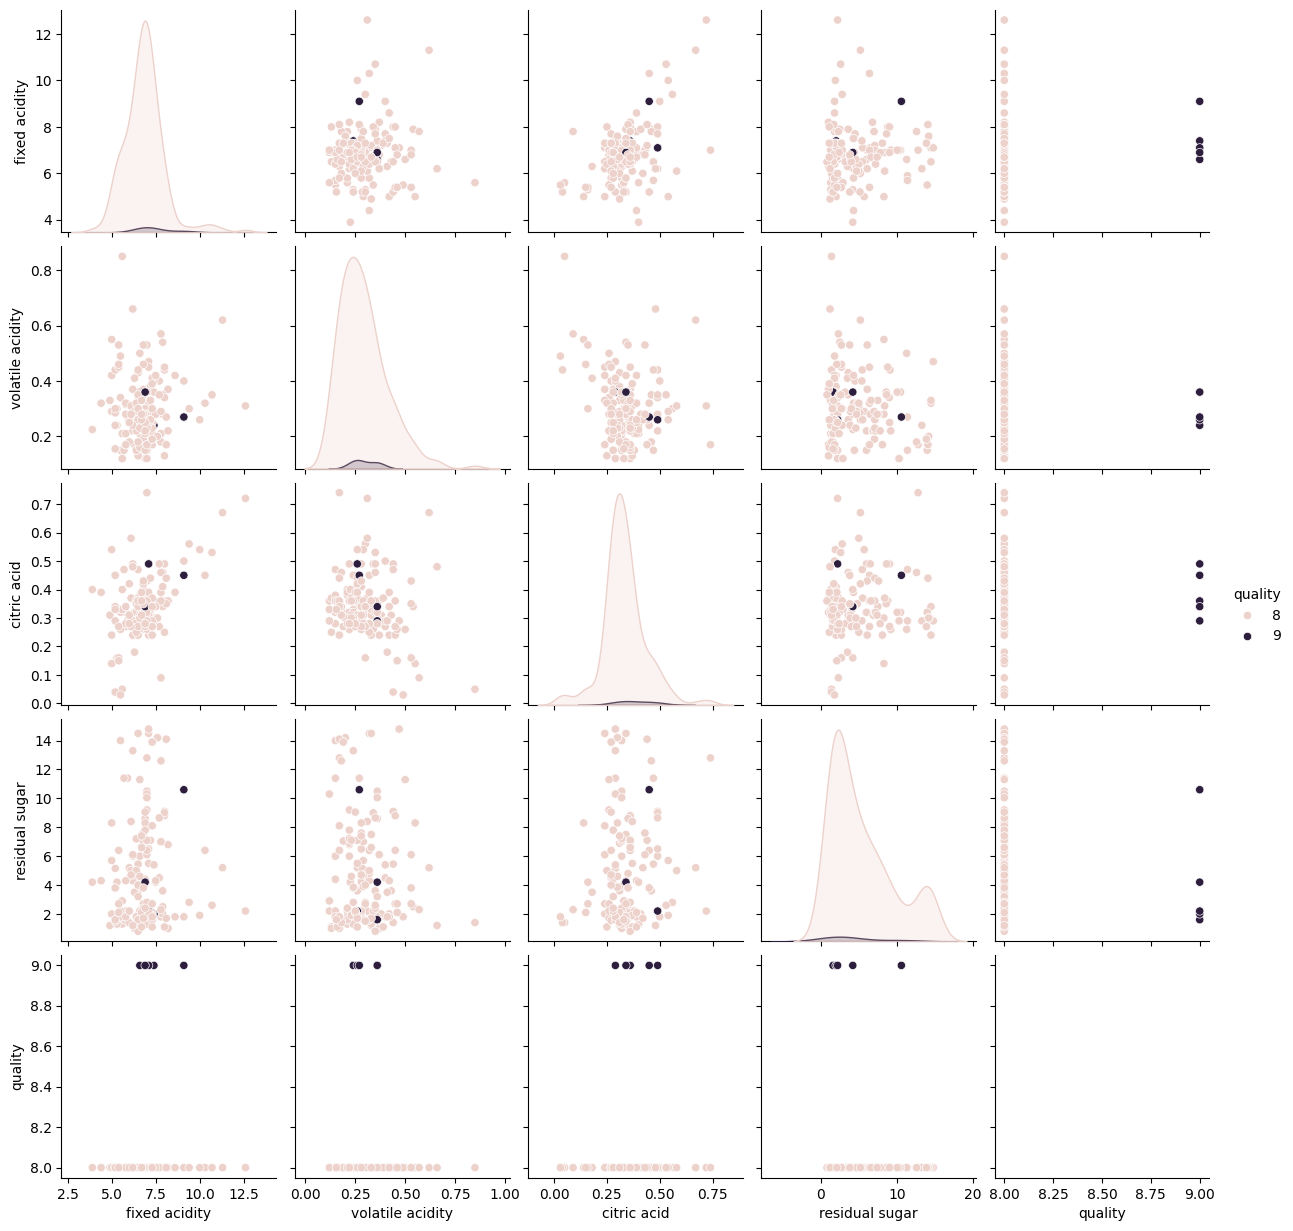

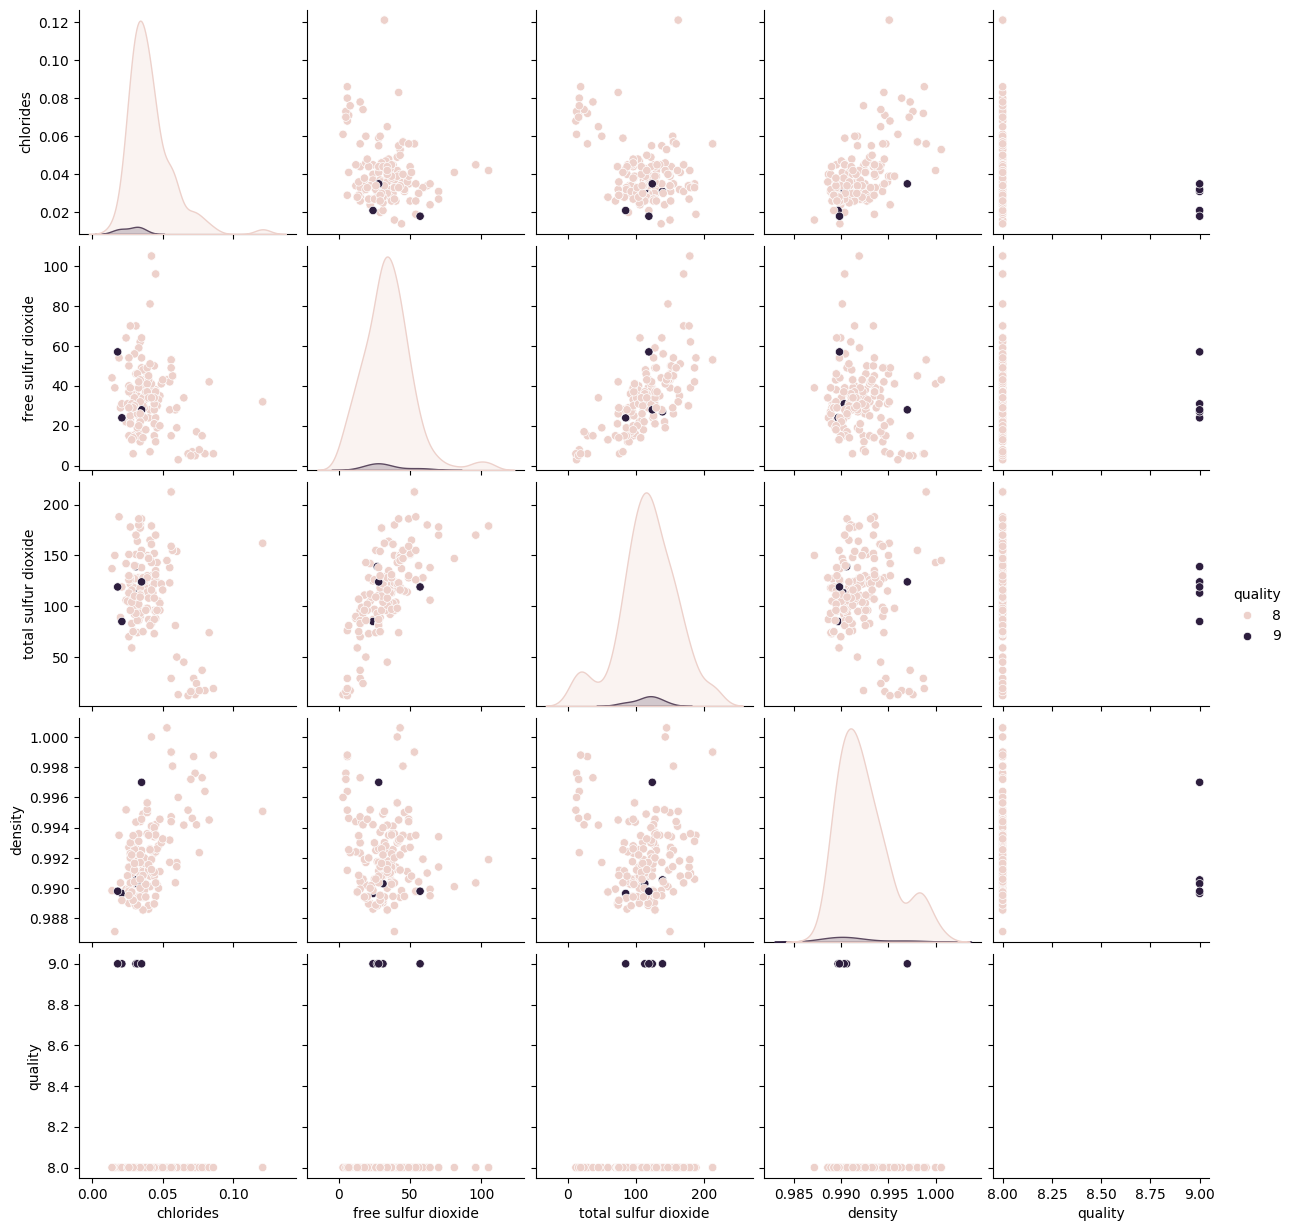

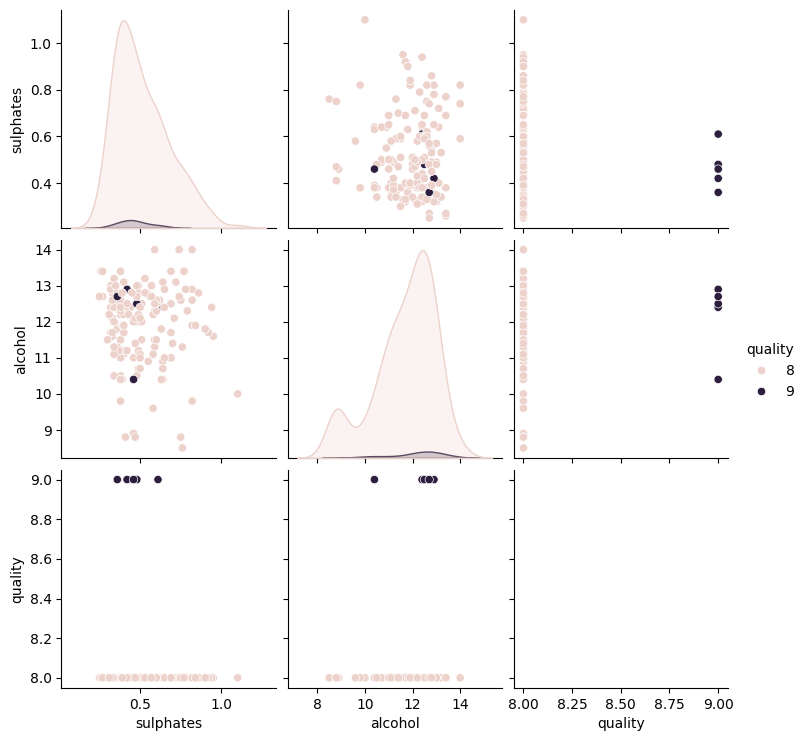

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

In [17]:
plot_pairplots(df_vinos, "quality")